Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [1]:
install.packages('palmerpenguins')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# uncomment the code below and execute this cell
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [3]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

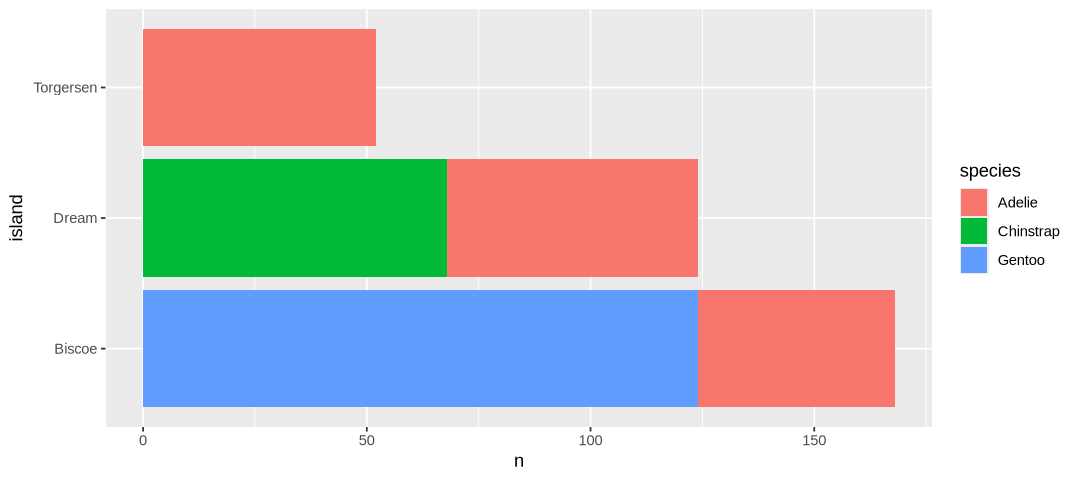

In [4]:
options(repr.plot.width = 9, repr.plot.height = 4)

penguins |>
    group_by(species) |>
    count(island) |>
ggplot(mapping = aes(x = n, y = island, fill = species)) +
    geom_col() 

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

Adelie penguins were observed on all three islands.

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

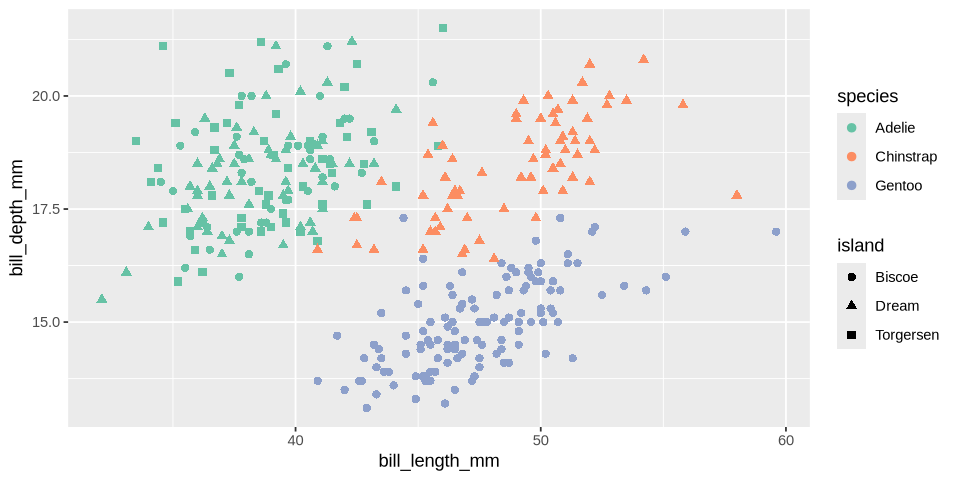

In [5]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(data = penguins, mapping = aes(x = bill_length_mm, 
                                      y = bill_depth_mm,
                                      color = species,
                                      shape = island)) + 
    geom_point(na.rm = TRUE, size = 2) + # na.rm remove na values
    scale_color_brewer(palette = 'Set2') 

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


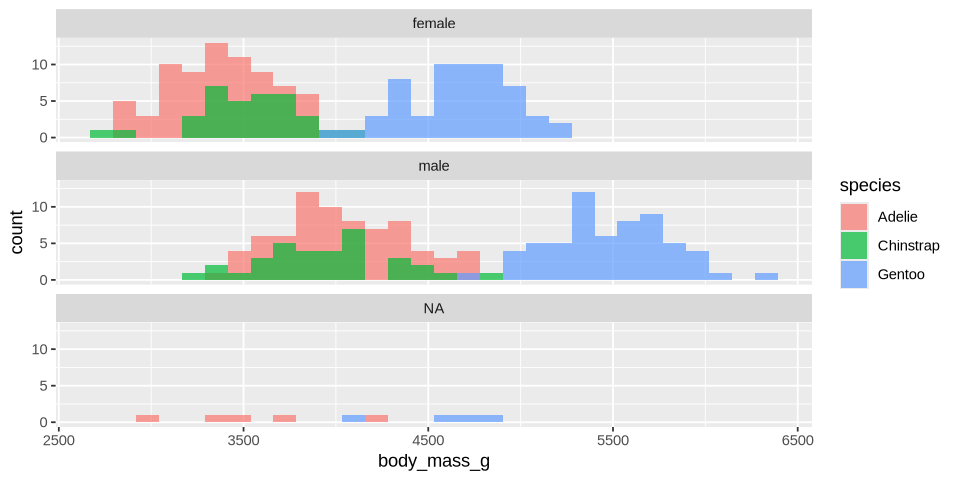

In [6]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, fill = species)) + 
    geom_histogram(na.rm = T, position = "identity", alpha = 0.7) +
    scale_color_brewer(palette = 'Set2') + 
    facet_wrap(~sex, ncol=1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


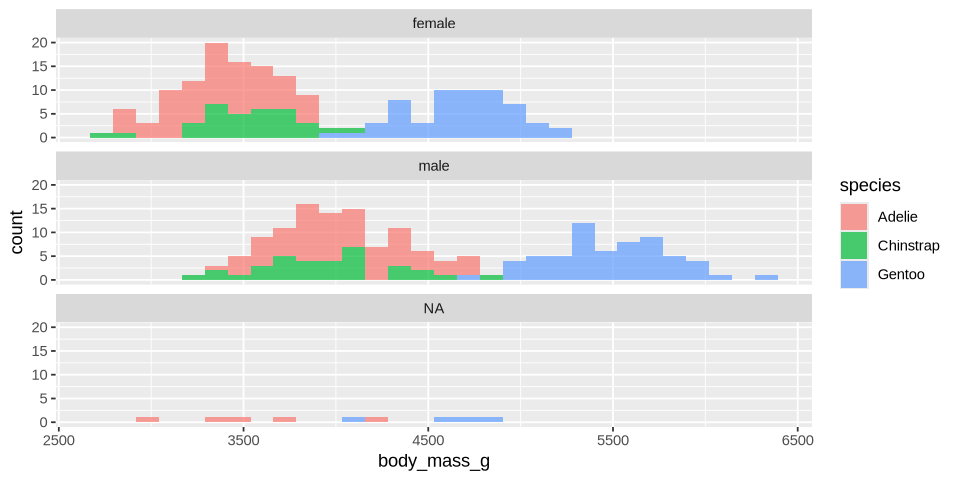

In [7]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, fill = species)) + 
    geom_histogram(na.rm = T, alpha = 0.7) +
    scale_color_brewer(palette = 'Set2') + 
    facet_wrap(~sex, ncol=1)

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

Without position = "identity" in the geom_histogram layer, the counts of each species are stacked on top of each other. For the bar at the 3500 g mark, on the graph with "identity, we see the female Chinstrap count as 5 and the female Adelie count as 11. At the same spot on the graph without the "identity," the count is now 16, with the 5 Chinstrap on the bottom of the stack and 11 Adelie on the top of the stack. 

Leaving identity out is helpful if you want to see the total count for each bin regardless of the island. 

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [8]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [10]:
txhousing = txhousing |> select(city, year, month, sales, 
                    volume, median, listings, date) 

#txhousing |> head()

# is there a faster way to do this?

Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [13]:
dallas_sub = txhousing |> filter(city == 'Dallas', year == 2012 | year == 2013) 

#dallas_sub |> head()

In [14]:
#dallas_sub |> tail()

Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [17]:
dallas_sub = dallas_sub |> 
    mutate(prct_sold = sales/listings * 100) 

#dallas_sub |> head()

Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [19]:
dallas_summary = dallas_sub |>
    group_by(month) |>
    summarize(mean_prct_sold = mean(prct_sold, na.rm = TRUE))

#dallas_summary |> head()

Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [20]:
dallas_summary |> slice_max(mean_prct_sold, n=3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [21]:
txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") |>
   mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


This code chunk does the same process we just went through, but in one code cell instead of step by step. This code chunk determines the top three months of percent of houses sold (largest three percents and their corresponding months) in the Dallas area in 2012 and 2013. These were August, May, and June. 

I'm still very new to R so I do wonder how we could group by year and then by month because one month of one year could be much higher than the other year, but when averaged comes out less than the average of August (if that makes sense - so instead of grouping by 1-12, instead have 2012 1-12 and 2013 1-12, then ranking/slicing)  